In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


In [ ]:
 # Load the dataset
stroke_data = pd.read_csv("/content/drive/MyDrive/stroke_risk_dataset.csv")

# Display the first few rows
stroke_data.head()


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


# **EDA (Exploratory Data Analysis)**

In [ ]:
# Basic info
print(stroke_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [ ]:
print(stroke_data.describe())


         Chest Pain  Shortness of Breath  Irregular Heartbeat  \
count  70000.000000         70000.000000         70000.000000   
mean       0.501871             0.496471             0.498886   
std        0.500000             0.499991             0.500002   
min        0.000000             0.000000             0.000000   
25%        0.000000             0.000000             0.000000   
50%        1.000000             0.000000             0.000000   
75%        1.000000             1.000000             1.000000   
max        1.000000             1.000000             1.000000   

       Fatigue & Weakness     Dizziness  Swelling (Edema)  \
count        70000.000000  70000.000000      70000.000000   
mean             0.500100      0.503043          0.500557   
std              0.500004      0.499994          0.500003   
min              0.000000      0.000000          0.000000   
25%              0.000000      0.000000          0.000000   
50%              1.000000      1.000000         

In [ ]:
print(stroke_data.isnull().sum())


Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


In [ ]:
# Check for duplicates
print("Duplicates:", stroke_data.duplicated().sum())



Duplicates: 1021


In [ ]:
# Stroke class distribution
print(stroke_data['At Risk (Binary)'].value_counts(normalize=True))


At Risk (Binary)
1    0.6492
0    0.3508
Name: proportion, dtype: float64


# **Visualization**

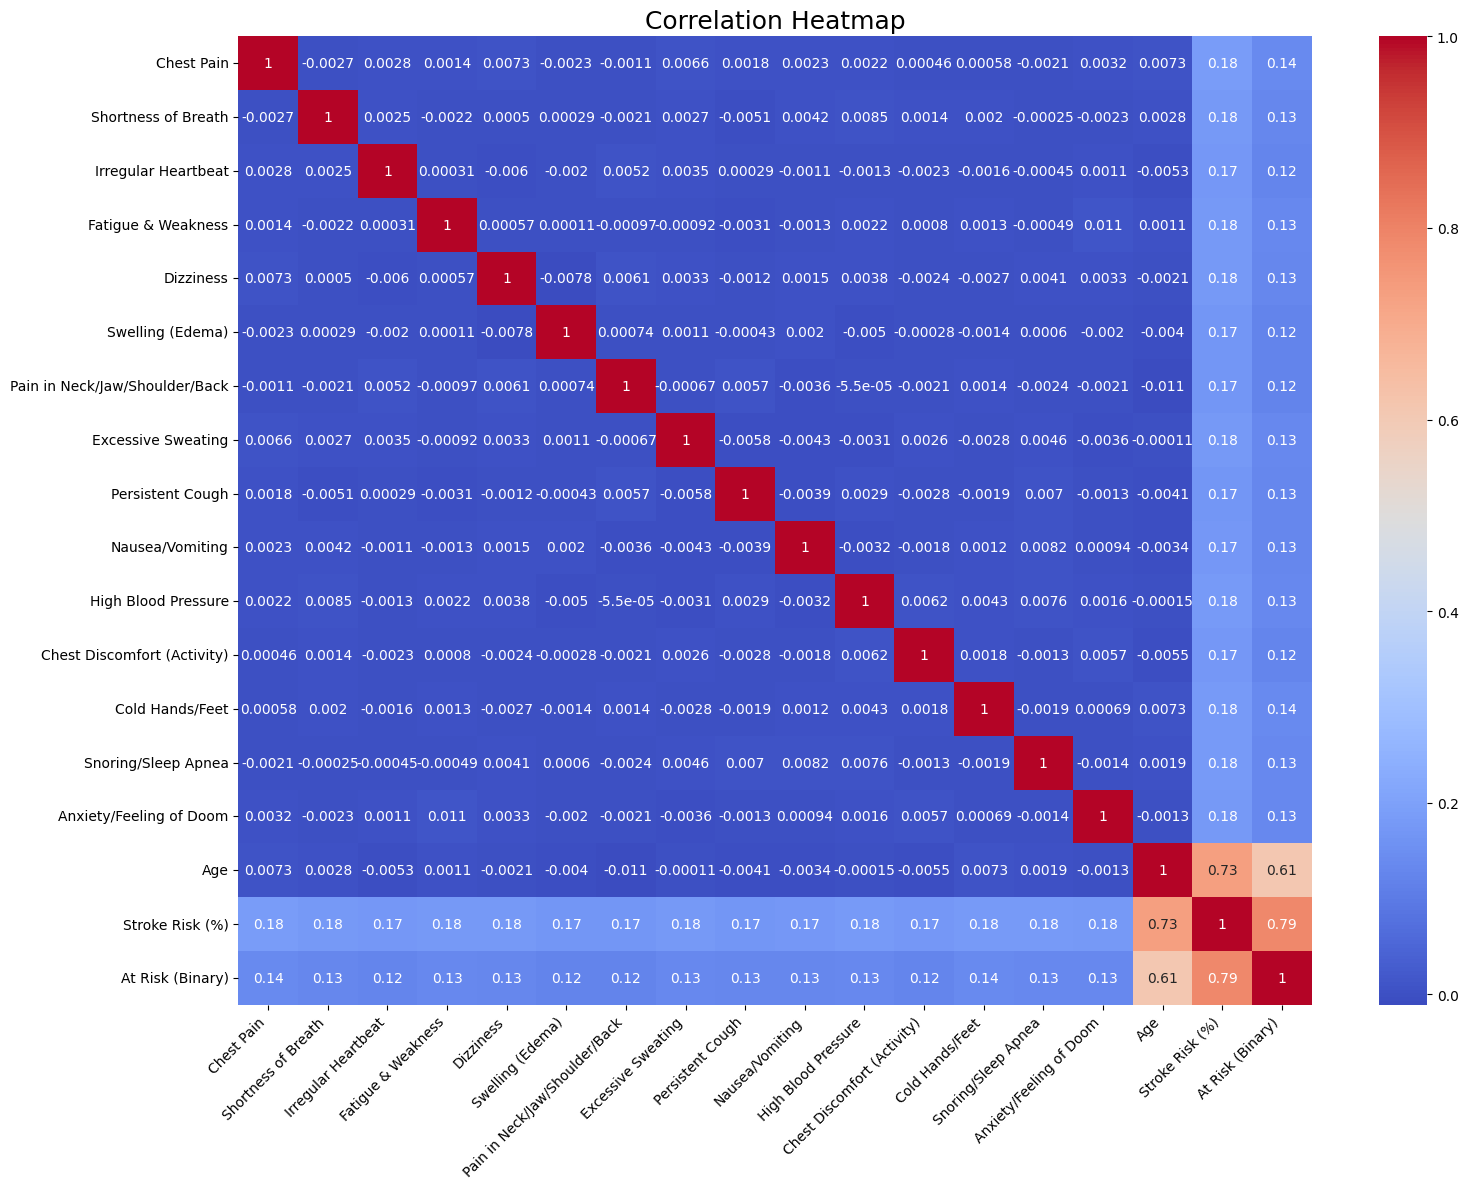

In [ ]:
# Correlation heatmap with larger figure
plt.figure(figsize=(16, 12))  # Increase width and height as needed
sns.heatmap(stroke_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


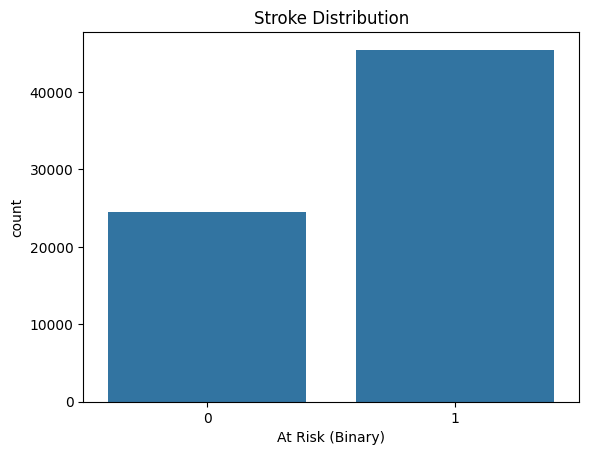

In [ ]:
# Target balance
sns.countplot(data=stroke_data, x='At Risk (Binary)')
plt.title("Stroke Distribution")
plt.show()



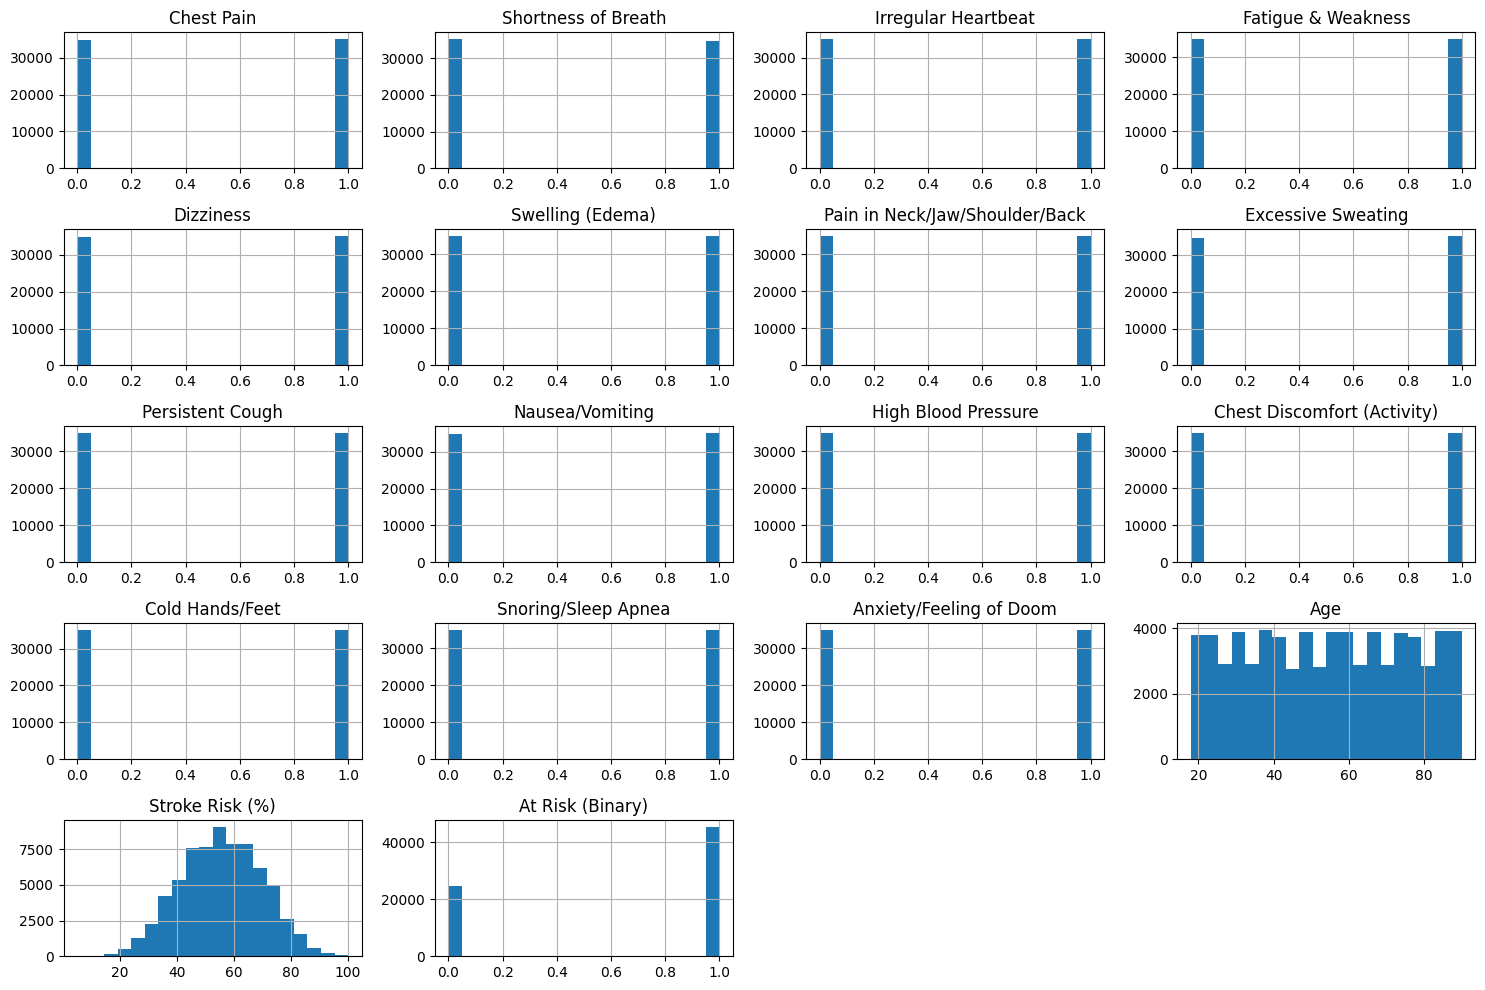

In [ ]:
# Numerical features distribution
num_cols = stroke_data.select_dtypes(include=['float64', 'int64']).columns
stroke_data[num_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


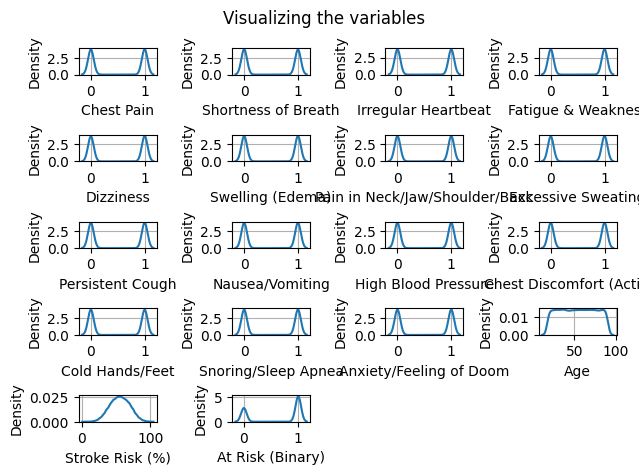

In [ ]:
r=5
c=4
it=1
for i in stroke_data.columns:
    plt.suptitle("Visualizing the variables")
    plt.subplot(r,c,it)
    if stroke_data[i].dtype=="object":
        sns.countplot(x=stroke_data[i])
    else:
        sns.kdeplot(x=stroke_data[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

# **Pre-processing**

In [ ]:
stroke_data.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

1. rename the columns

In [ ]:
stroke_data.columns = stroke_data.columns.str.strip().str.lower().str.replace(r'[^a-zA-Z0-9]', '_', regex=True)
print(stroke_data.columns)


Index(['chest_pain', 'shortness_of_breath', 'irregular_heartbeat',
       'fatigue___weakness', 'dizziness', 'swelling__edema_',
       'pain_in_neck_jaw_shoulder_back', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'high_blood_pressure',
       'chest_discomfort__activity_', 'cold_hands_feet', 'snoring_sleep_apnea',
       'anxiety_feeling_of_doom', 'age', 'stroke_risk____',
       'at_risk__binary_'],
      dtype='object')


In [ ]:
stroke_data.rename(columns={'stroke_risk____': 'prec_stroke_risk'}, inplace=True)
stroke_data.rename(columns={'at_risk__binary_': 'bin_stroke_risk'}, inplace=True)
stroke_data.rename(columns={'pain_in_neck_jaw_shoulder_back': 'pain_neck_jaw_shoulder_back'}, inplace=True)


2. Apply Standerdization

In [ ]:
scaler = MinMaxScaler()
stroke_data['age'] = scaler.fit_transform(stroke_data[['age']])
stroke_data

,chest_pain,shortness_of_breath,irregular_heartbeat,fatigue___weakness,dizziness,swelling__edema_,pain_neck_jaw_shoulder_back,excessive_sweating,persistent_cough,nausea_vomiting,high_blood_pressure,chest_discomfort__activity_,cold_hands_feet,snoring_sleep_apnea,anxiety_feeling_of_doom,age,prec_stroke_risk,bin_stroke_risk
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0.500000,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0.430556,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0.611111,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0.416667,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0.597222,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0.000000,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0.083333,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0.430556,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0.375000,48.5,0


In [ ]:

stroke_data['prec_stroke_risk'] = stroke_data['prec_stroke_risk'] / 100
stroke_data

,chest_pain,shortness_of_breath,irregular_heartbeat,fatigue___weakness,dizziness,swelling__edema_,pain_neck_jaw_shoulder_back,excessive_sweating,persistent_cough,nausea_vomiting,high_blood_pressure,chest_discomfort__activity_,cold_hands_feet,snoring_sleep_apnea,anxiety_feeling_of_doom,age,prec_stroke_risk,bin_stroke_risk
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0.500000,0.580,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0.430556,0.405,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0.611111,0.520,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0.416667,0.600,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0.597222,0.565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0.000000,0.300,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0.083333,0.330,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0.430556,0.455,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0.375000,0.485,0


In [ ]:
stroke_data.to_csv('/content/drive/MyDrive/preprocessed_stroke.csv')

3. Split the data into (training, validation, testing)

In [ ]:

# Separate features and target
X = stroke_data.drop('bin_stroke_risk', axis=1)
y = stroke_data['bin_stroke_risk']
target = 'at_risk__binary_'

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)  # 0.1765 x 0.85 ≈ 0.15 total val

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (48998, 17)
Validation: (10502, 17)
Test: (10500, 17)


4. balance the data:

In [ ]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training dataset shape: {X_train.shape}")
print(f"Resampled training dataset shape: {X_train_resampled.shape}")

from collections import Counter
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_resampled)}")



Original training dataset shape: (48998, 17)
Resampled training dataset shape: (63618, 17)
Before SMOTE: Counter({1: 31809, 0: 17189})
After SMOTE: Counter({0: 31809, 1: 31809})
